# Column:

1. **RowNumber**: Sequential number assigned to each row.
2. **CustomerId**: Unique identifier for each customer.
3. **Surname**: Customer's surname or last name.
4. **CreditScore**: Numeric value representing the customer's credit score.
5. **Geography**: Categorical variable indicating the customer's geographic location.
6. **Gender**: Categorical variable representing the customer's gender.
7. **Age**: Numeric value indicating the customer's age.
8. **Tenure**: Number of years the customer has been associated with the bank.
9. **Balance**: Numeric value representing the customer's account balance.
10. **NumOfProducts**: Number of bank products/services used by the customer.
11. **HasCrCard**: Binary variable indicating if the customer has a credit card (1 for yes, 0 for no).
12. **IsActiveMember**: Binary variable indicating if the customer is an active bank member (1 for yes, 0 for no).
13. **EstimatedSalary**: Estimated salary of the customer.
14. **Exited**: Binary variable indicating if the customer churned (left the bank) (1 for yes, 0 for no).
15. **Complain**: Binary variable indicating if the customer has lodged a complaint (1 for yes, 0 for no).
16. **Satisfaction Score**: Customer satisfaction score (if available).
17. **Card Type**: Type of credit card (if applicable).
18. **Point Earned**: Points earned by the customer through bank transactions or programs.

#### If this Kernel helped you in any way, some <font color="red"><b>UPVOTES</b></font> would be very much appreciated

# Goal of Analysis:

The goal of this analysis is to understand the factors influencing customer churn in the bank. By exploring various features such as customer demographics, financial attributes, and behavioral patterns, the aim is to build a predictive model to identify key drivers of customer churn. The analysis seeks to uncover insights that can help in retaining customers and improving overall customer satisfaction.


#### Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Cleaning the Data](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
1. [Step 3: Data Visualization](#3)
    - Histogram
    - Barplot
    -Boxplot
1. [Step 4: Data Preparation](#4) 
   - Dummy Variable
   - Rescaling
1. [Step 5: Splitting the Data into Training and Testing Sets](#5)
1. [Step 6: Using Various Models](#6)
   - Logistic Regression
   - Random Forest
   - GBoost Model
   - SVM
   - KNN
   - Decision Tree
   - Naive Bayes
1. [Step 7: Model Evaluation](#7)
   - Recall
   - Precision
   - F1
   - Accuracy
   - AUC and ROC curve

In [399]:
# importing library to import data
from ucimlrepo import fetch_ucirepo 

# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

<a id="1"></a> <br>
## Step 1 : Reading and Understanding the Data

In [330]:
# Uploading the train_dataset
df = pd.read_csv("Customer-Churn-Records.csv")

In [331]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0,0,5,GOLD,425


In [332]:
# shape of the data
df.shape

(10000, 18)

In [333]:
# Columns of dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [334]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [335]:
# description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


<a id="2"></a> <br>
## Step 2: Cleaning the Data

We need to do some basic cleansing activity in order to feed our model the correct data.

In [336]:
# Removing the columns not useful for dataset
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [337]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0,0,5,GOLD,425


In [338]:
# Checking missing values
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [339]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

<a id="3"></a> <br>
## Step 3: Visualising the Data

- Here we will identify if some predictors directly have a strong association with the outcome variable `exited`.

In [340]:
# Percentage of customer churn or stayed in the bank
total_customers = len(df)
churned_count = df[df['Exited'] == 1]['Exited'].count()
not_churned_count = df[df['Exited'] == 0]['Exited'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100

print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Percentage of customers who churned: 20.38%
Percentage of customers who did not churn: 79.62%


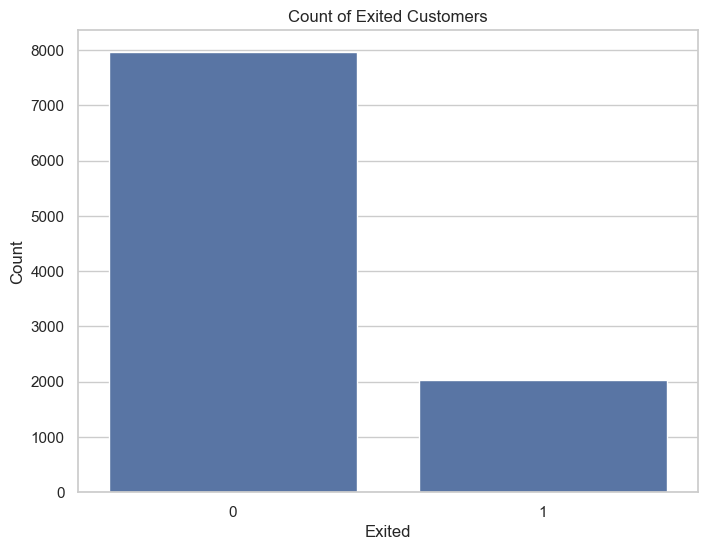

In [341]:
sns.set(style="whitegrid")  

# Plotting a bar plot for the 'Exited' column
plt.figure(figsize=(8, 6))  
sns.countplot(data=df, x='Exited')  
plt.title('Count of Exited Customers')  
plt.xlabel('Exited')  
plt.ylabel('Count')  
plt.show()  

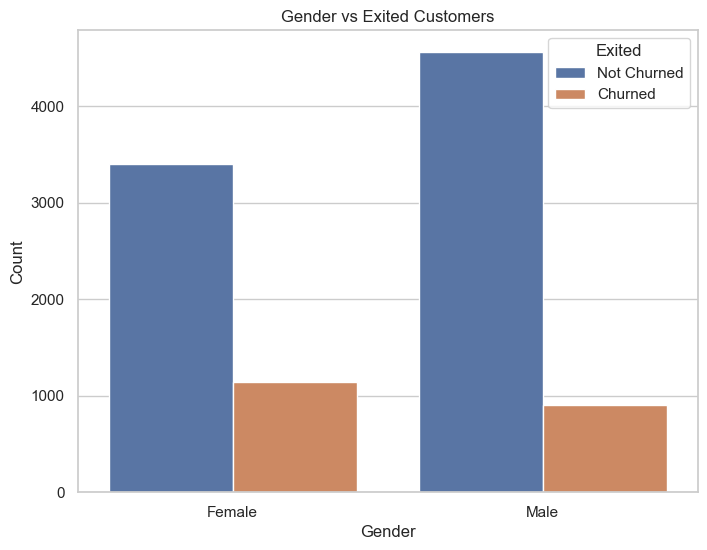

In [342]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Gender vs Exited Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** Female customers exhibit a higher tendency to churn the bank compared to male customers.


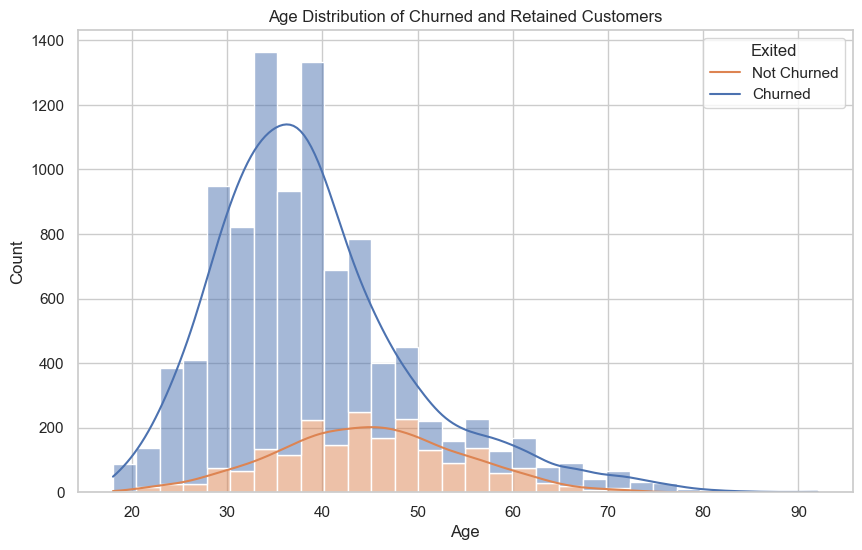

In [343]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Exited', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


**Insight:** The age distribution of churned individuals appears right-skewed, indicating that the probability of older individuals not churning is higher.


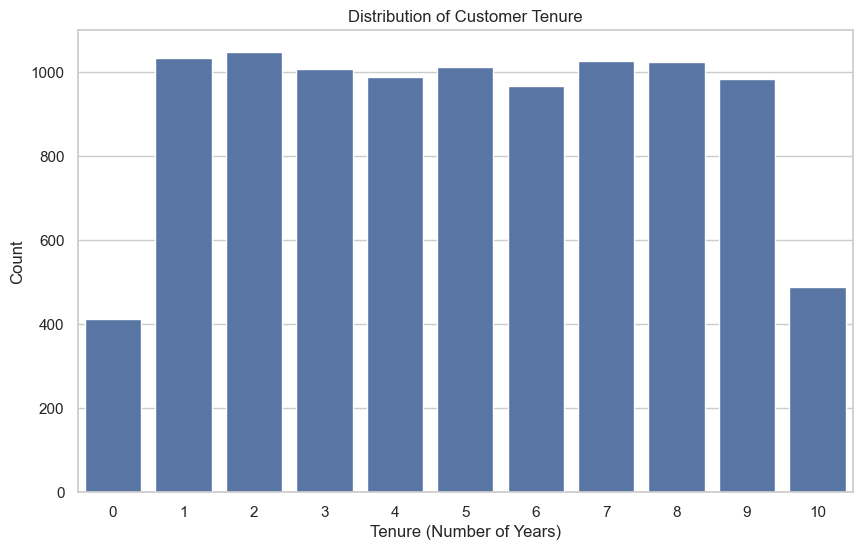

In [344]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tenure')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Number of Years)')
plt.ylabel('Count')
plt.show()


In [345]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

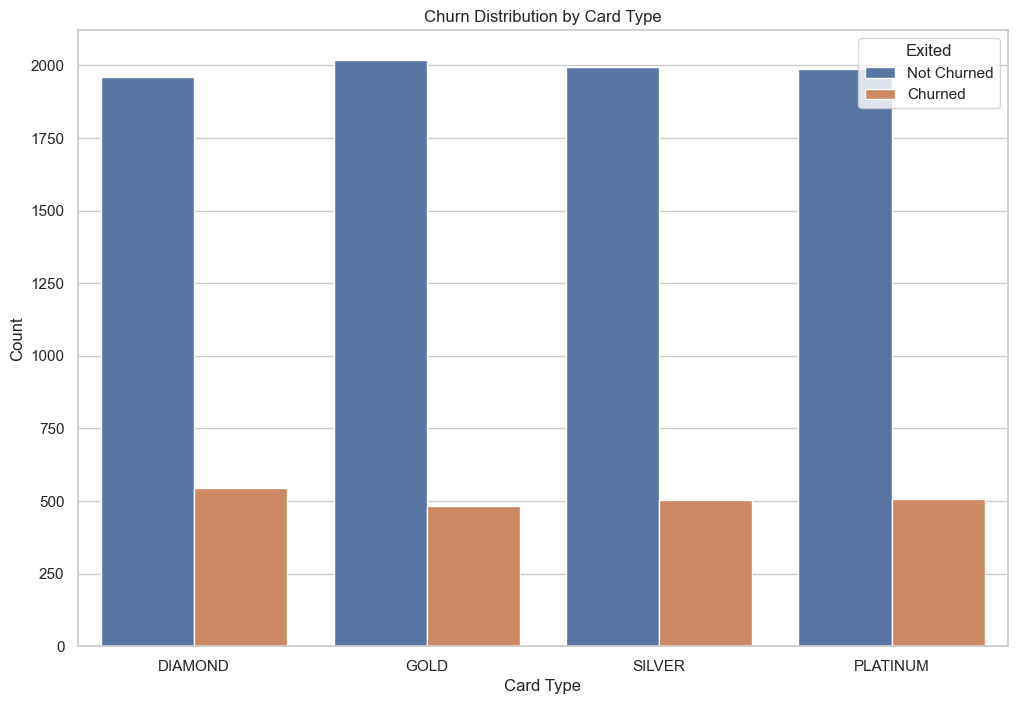

In [346]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Card Type', hue='Exited', order=['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'])
plt.title('Churn Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


**Insight:** There appears to be no significant effect of Card Type on customer churn or retention.

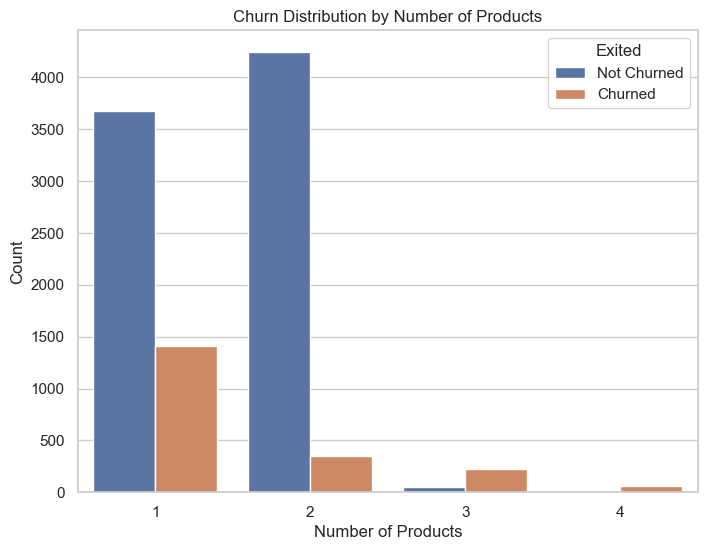

In [347]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.title('Churn Distribution by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


In [348]:
# Calculate churn percentages by number of products
churn_percentage_by_product_count = df.groupby('NumOfProducts')['Exited'].mean() * 100

# Display churn percentage by number of products
print("Churn Percentage by Number of Products:")
print(churn_percentage_by_product_count)

Churn Percentage by Number of Products:
NumOfProducts
1   27.7144 
2   7.6035  
3   82.7068 
4   100.0000
Name: Exited, dtype: float64


**Insight:** Customers with a higher number of products (3 or 4) exhibit a higher probability of churn. Conversely, customers with only 2 products have a lower chance of leaving the bank compared to those with just 1 product.

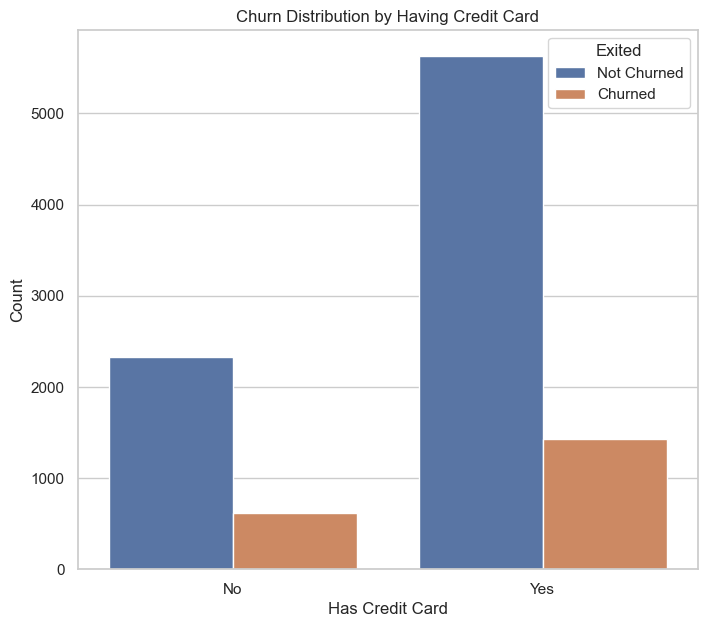

In [349]:
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title('Churn Distribution by Having Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Set x-axis labels as 'No' and 'Yes'
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


In [350]:
# Calculate churn percentages by HasCrCard
churn_percentage_by_card = df.groupby('HasCrCard')['Exited'].mean() * 100

# Display churn percentage by HasCrCard
print("Churn Percentage by Having Credit Card:")
print(churn_percentage_by_card)

Churn Percentage by Having Credit Card:
HasCrCard
0   20.8149
1   20.1984
Name: Exited, dtype: float64


**Insight:** The presence or absence of a credit card does not significantly affect whether a person churns or remains with the bank.

In [351]:
df['Satisfaction Score'].unique()

array([2, 3, 5, 4, 1])

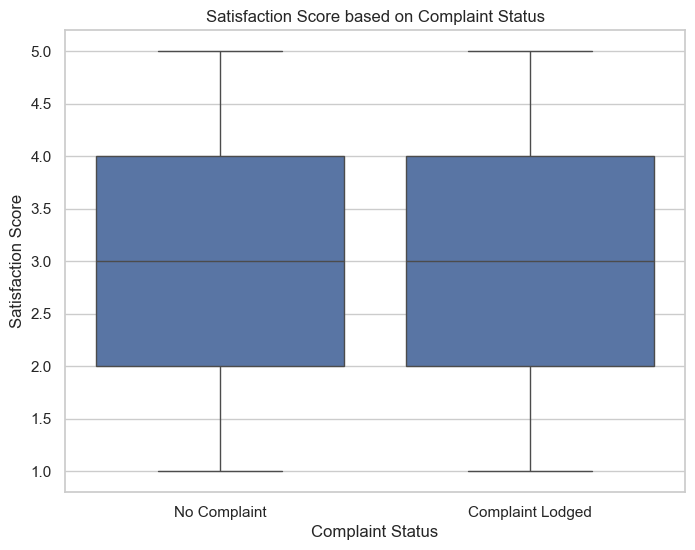

In [352]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Complain', y='Satisfaction Score')
plt.title('Satisfaction Score based on Complaint Status')
plt.xlabel('Complaint Status')
plt.ylabel('Satisfaction Score')
plt.xticks(ticks=[0, 1], labels=['No Complaint', 'Complaint Lodged'])  # Set x-axis labels
plt.show()


**Insight:** The satisfaction scores for customers who lodged a complaint and those who did not are similar, indicating a consistent level of satisfaction with the resolution of issues regardless of complaint status.

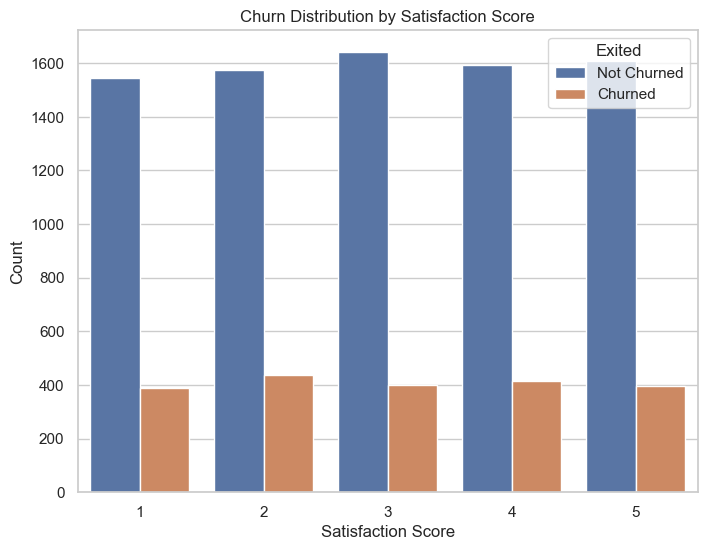

In [353]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Satisfaction Score', hue='Exited', order=[1, 2, 3, 4, 5])
plt.title('Churn Distribution by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** There appears to be no significant correlation between satisfaction scores and customer churn. Higher satisfaction scores do not seem to have a discernible impact on reducing churn rates.

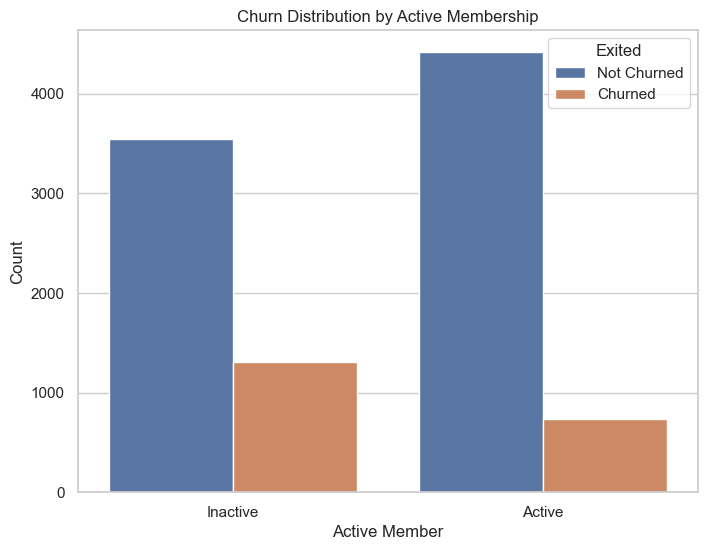

In [354]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title('Churn Distribution by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** Active members tend to have a higher likelihood of staying (not churning) compared to inactive members.


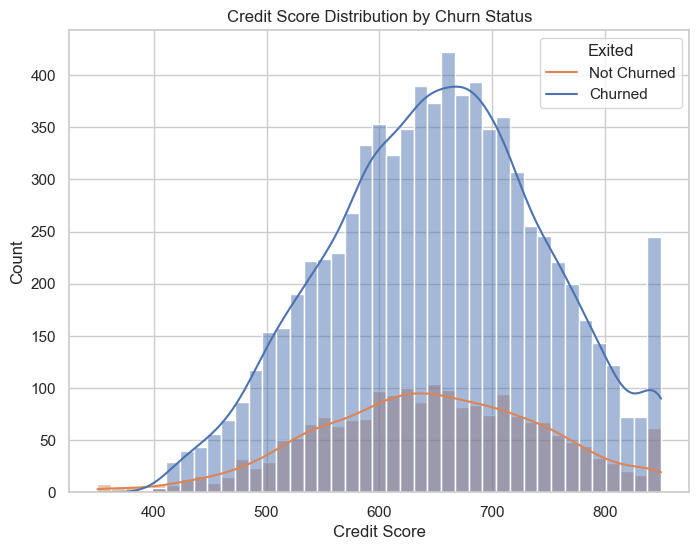

In [355]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='CreditScore', hue='Exited', kde=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** 
- Customers with lower credit scores (400-500 range) show a higher tendency to churn, indicating a likelihood for churn among this group.
- Conversely, customers with higher credit scores (700-800 range) exhibit a greater tendency to stay with the service, suggesting higher retention rates among this cohort.

#### Age vs. Credit Score and Churn

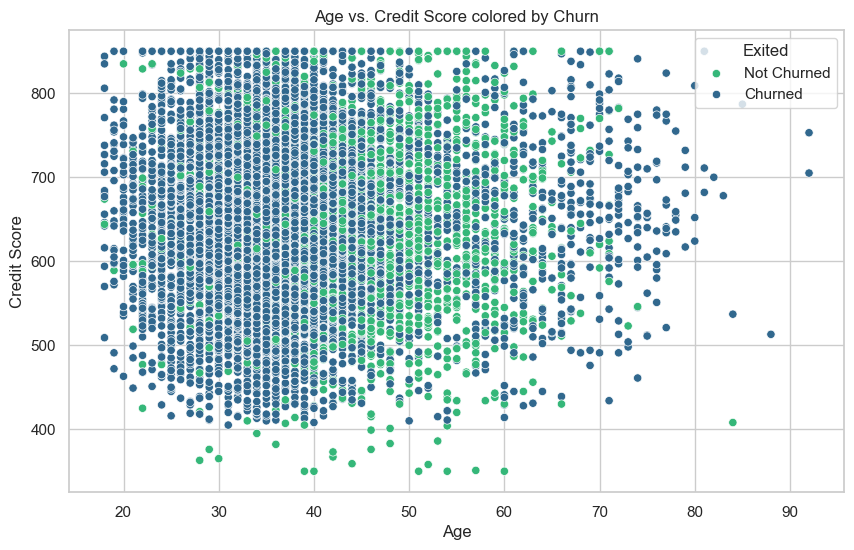

In [356]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Age vs. Credit Score colored by Churn')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insights:**
- Age positively correlates with credit score, indicating older customers tend to have higher credit scores, attributed to their longer credit history and financial decisions over time.
- Higher credit scores are associated with lower churn rates, reflecting greater financial stability among customers.
- A cluster of churned customers is observed in the lower-left corner, likely younger individuals with lower credit scores, potentially facing financial constraints leading to a higher likelihood of churn.

#### Estimated Salary vs. Credit Score and Churn

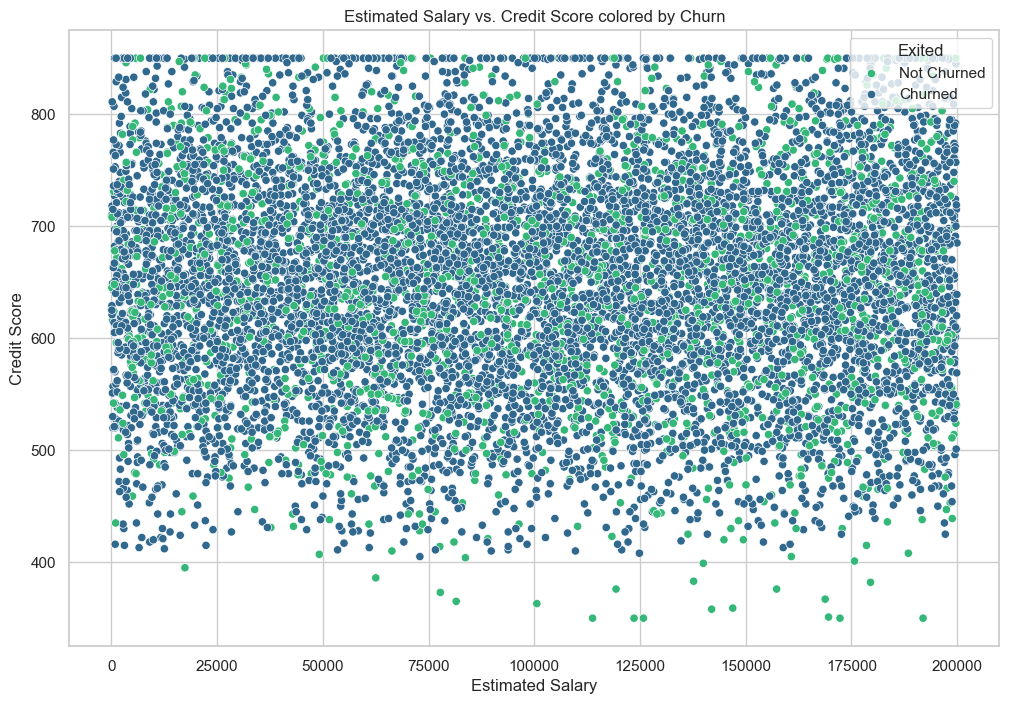

In [357]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='EstimatedSalary', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Estimated Salary vs. Credit Score colored by Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insights:**
- Weak positive correlation between estimated salary and credit score: Higher estimated salaries slightly correlate with higher credit scores, but exceptions exist with low credit scores despite high salaries.
- Higher credit scores associate with lower churn likelihood: Customers with better credit profiles tend to exhibit more financial stability, reducing the probability of service cancellations due to financial constraints.
- No clear pattern in churn behavior: Churned customers exhibit no identifiable trend regarding estimated salary or credit score, indicating no direct relationship between these factors and churn propensity.

#### Balance vs. Credit Score and Churn

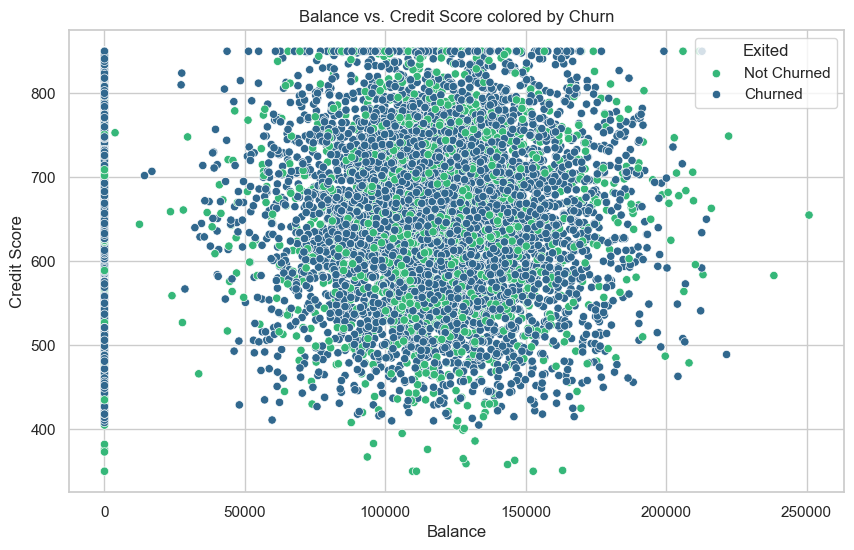

In [358]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Balance vs. Credit Score colored by Churn')
plt.xlabel('Balance')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


**Insights:**
- Negative correlation: Higher account balances tend to correspond with lower credit scores, possibly indicating higher debt impacting credit scores.
- Credit score impact on churn: Favorable credit profiles are linked to lower churn rates, reflecting greater financial stability.
- Churned customer cluster: Lower-right plot cluster represents customers with high balances and low credit scores, potentially facing financial strain leading to higher churn likelihood.

<a id="4"></a> <br>
## Step 4: Data Preparation

In [359]:
cat_col

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [360]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df[cat_col], drop_first = True)
dummies.shape

(10000, 6)

In [361]:
# Add the results to the original dataframe

df = pd.concat([df, dummies], axis = 1)

In [362]:
# Drop the original cat variables as dummies are already created

df.drop(cat_col, axis = 1, inplace = True)
df.shape

(10000, 18)

In [363]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.0000,1,1,1,101348.8800,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.8600,1,0,1,112542.5800,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.8000,3,1,0,113931.5700,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.0000,2,0,0,93826.6300,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.8200,1,1,1,79084.1000,0,0,5,425,0,1,0,1,0,0


### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [364]:
from sklearn.preprocessing import StandardScaler

num_columns_list = num_col.tolist()
num_columns_list.remove("Exited")
num_col = pd.Index(num_columns_list)
numerical_columns = num_col

scaler = StandardScaler()
scaler.fit(df[numerical_columns])
df[numerical_columns] = scaler.transform(df[numerical_columns])


In [365]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.3262,0.2935,-1.0418,-1.2258,-0.9116,0.6461,0.9702,0.0219,1,1.9729,-0.7211,-0.6308,0,0,0,0,0,0
1,-0.4400,0.1982,-1.3875,0.1174,-0.9116,-1.5478,0.9702,0.2165,0,1.9729,-0.0098,-0.6663,0,1,0,0,0,0
2,-1.5368,0.2935,1.0329,1.3331,2.5271,0.6461,-1.0307,0.2407,1,1.9729,-0.0098,-1.0159,0,0,0,0,0,0
3,0.5015,0.0075,-1.3875,-1.2258,0.8077,-1.5478,-1.0307,-0.1089,0,-0.5069,1.4128,-1.1355,0,0,0,1,0,0
4,2.0639,0.3889,-1.0418,0.7857,-0.9116,0.6461,0.9702,-0.3653,0,-0.5069,1.4128,-0.8035,0,1,0,1,0,0


In [366]:
df.dtypes

CreditScore           float64
Age                   float64
Tenure                float64
Balance               float64
NumOfProducts         float64
HasCrCard             float64
IsActiveMember        float64
EstimatedSalary       float64
Exited                int64  
Complain              float64
Satisfaction Score    float64
Point Earned          float64
Geography_Germany     uint8  
Geography_Spain       uint8  
Gender_Male           uint8  
Card Type_GOLD        uint8  
Card Type_PLATINUM    uint8  
Card Type_SILVER      uint8  
dtype: object

In [367]:
df["Exited"].unique()

array([1, 0])

<a id="5"></a> <br>
## Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

### Dividing into X and Y sets for the model building

In [368]:
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

In [369]:
y.dtypes

dtype('int64')

In [370]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 80/20 ratio

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [371]:
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
8369,0.3463,-0.1833,-1.3875,0.8067,0.8077,0.6461,0.9702,-1.2189,1.9729,-1.4324,-0.4228,1,0,1,1,0,0
9722,0.2946,-0.2786,-0.6960,-1.2258,0.8077,0.6461,0.9702,-1.7015,-0.5069,1.4128,0.7369,0,0,0,0,0,1
6950,0.0152,-0.0879,0.3414,0.7468,0.8077,0.6461,0.9702,1.5401,-0.5069,1.4128,-1.3346,0,1,0,0,1,0
1919,-0.3366,1.6285,0.6871,-1.2258,-0.9116,0.6461,0.9702,0.7357,1.9729,1.4128,-0.7194,0,0,1,0,0,0
5713,-1.1747,0.7703,1.7245,-1.2258,0.8077,-1.5478,0.9702,-1.2974,-0.5069,-1.4324,0.3120,0,0,1,0,1,0


In [372]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,8000.0000,-0.0070,0.9961,-3.1095,-0.6987,0.0049,0.6878,2.0639
Age,8000.0000,0.0009,0.9998,-1.9950,-0.6600,-0.1833,0.4842,5.0612
Tenure,8000.0000,-0.0025,1.0020,-1.7333,-1.0418,-0.0044,0.7736,1.7245
Balance,8000.0000,0.0040,0.9987,-1.2258,-1.2258,0.3306,0.8206,2.5948
NumOfProducts,8000.0000,-0.0059,0.9978,-0.9116,-0.9116,-0.9116,0.8077,4.2464
HasCrCard,8000.0000,-0.0047,1.0022,-1.5478,-1.5478,0.6461,0.6461,0.6461
IsActiveMember,8000.0000,-0.0002,1.0001,-1.0307,-1.0307,0.9702,0.9702,0.9702
EstimatedSalary,8000.0000,0.0003,0.9967,-1.7403,-0.8476,-0.0024,0.8537,1.7368
Complain,8000.0000,-0.0016,0.9989,-0.5069,-0.5069,-0.5069,-0.5069,1.9729
Satisfaction Score,8000.0000,-0.0012,1.0011,-1.4324,-0.7211,-0.0098,0.7015,1.4128


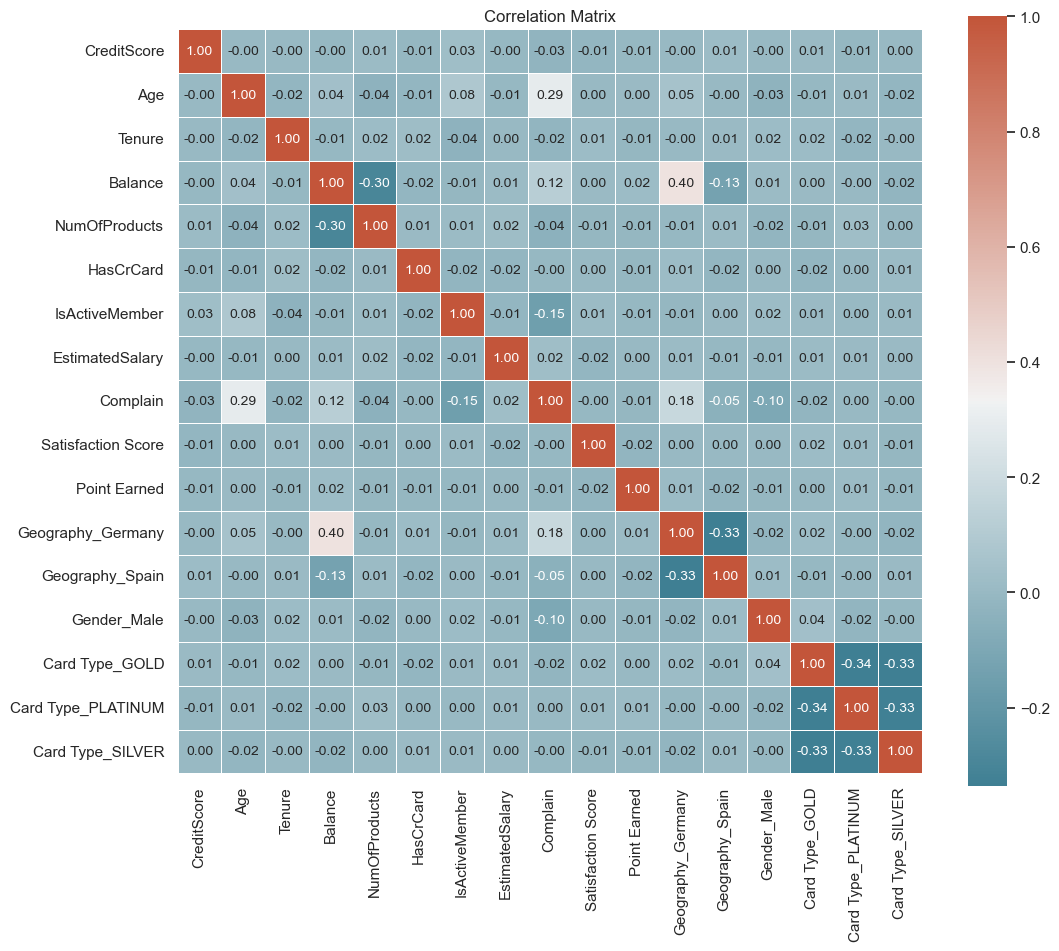

In [373]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(12, 10))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10}, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Insights:**
- **Credit Score**: Positively correlated with multiple variables. Higher credit scores relate to higher account balances, more credit cards, higher estimated salaries, active membership, and lower churn and complaints.
- **Age**: Positively correlated with tenure, balance, and number of products. Older customers typically have longer account tenures, higher balances, and more credit cards.
- **Tenure**: Positively correlated with balance and number of products. Longer account tenures associate with higher balances and more credit cards.
- **Balance**: Positively correlated with the number of products. Higher balances link to having more credit cards.
- **Number of Products**: Positively correlated with having a credit card. More products are associated with a higher likelihood of having multiple credit cards.
- **Exited (Churned)**: Negatively correlated with most variables. Churned customers tend to have lower credit scores, balances, credit cards, estimated salaries, active memberships, and higher complaints.
- **Complained**: Negatively correlated with most variables. Customers who complained tend to exhibit similar traits to churned customers, including lower credit scores, balances, credit cards, estimated salaries, and active memberships.


<span style='color:blue'>**Overall, the correlation matrix suggests that credit score is a good indicator of a customer's overall financial health and relationship with the bank. Customers with higher credit scores tend to have more positive relationships with the bank, while customers with lower credit scores tend to have more negative relationships with the bank.**</span>


<a id="6"></a> <br>
## Step 6: Using Various Models

<font color='gray'> 

## Logistic Regression

</font>


Logistic Regression is a fundamental statistical method used for binary classification tasks. Unlike linear regression, it predicts the probability of an observation belonging to a particular class by applying the logistic function. This model is well-suited for problems where the dependent variable is categorical and has two possible outcomes. It's computationally efficient and provides interpretable results, making it a popular choice for various predictive modeling tasks.


In [374]:
model_lr = LogisticRegression()

# Fitting the model on the training data
model_lr.fit(X_train, y_train)

# Predicting on the test data
y_pred = model_lr.predict(X_test)

# Calculating the accuracy
logistic_regression_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model:", logistic_regression_accuracy)

Accuracy of the Logistic Regression model: 0.999


In [375]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



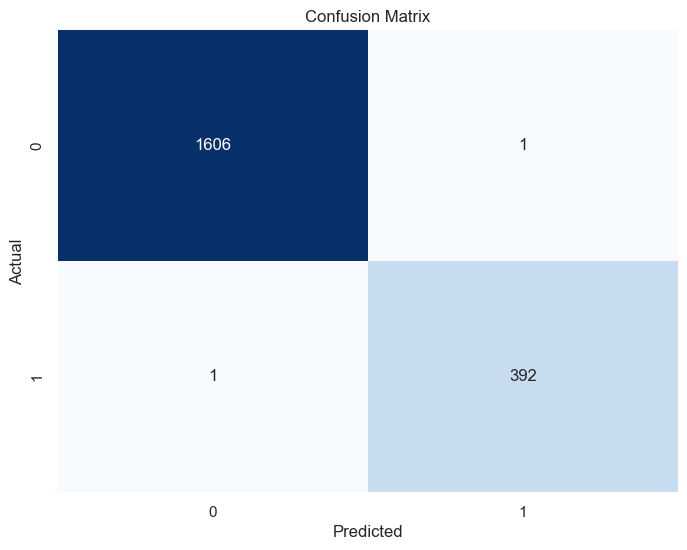

In [376]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

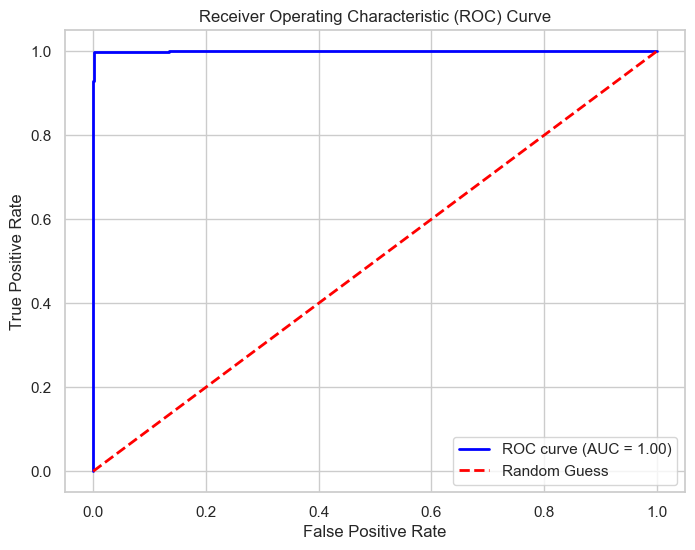

In [398]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_prob = model_lr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<font color='gray'> 

## Random Forest

</font>


Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training. Each tree in the forest independently predicts the target variable, and the final prediction is determined by averaging the predictions (regression) or taking a majority vote (classification) from all the trees. It's known for its robustness against overfitting, handles high-dimensional data well, and generally provides high predictive accuracy.

In [378]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

# Fitting the model on the training data
model_rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = model_rf.predict(X_test)

# Calculating the accuracy
random_forest_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest model:", random_forest_accuracy)

Accuracy of the Random Forest model: 0.999


In [379]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



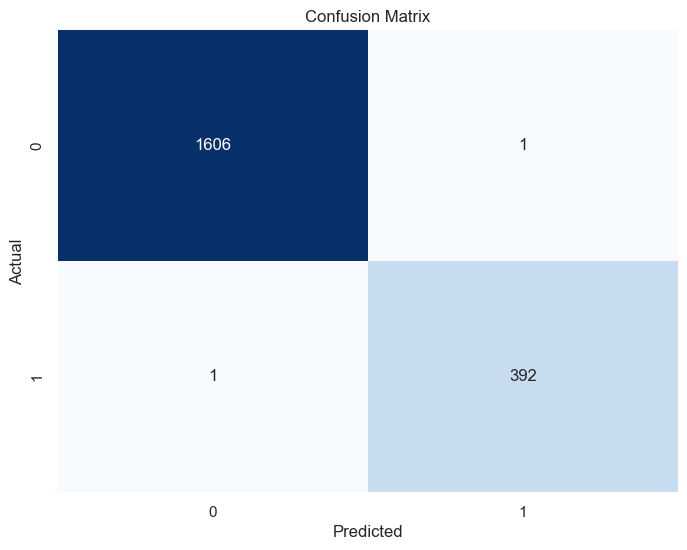

In [380]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## Gradient Boosting

</font>


Gradient Boosting is an ensemble learning technique that builds multiple decision trees sequentially, aiming to minimize errors made by the previous trees. It combines weak learners into a strong learner by focusing on the residuals or mistakes of the previous predictors. Gradient Boosting typically provides high predictive accuracy and is robust against overfitting, making it suitable for various regression and classification tasks.

In [381]:
from sklearn.ensemble import GradientBoostingClassifier


# Initialize the Gradient Boosting Classifier (GBM)
model_GB = GradientBoostingClassifier(random_state=45)  # You can adjust hyperparameters here

# Fit the model on the training data
model_GB.fit(X_train, y_train)

# Predict on the validation set
y_pred = model_GB.predict(X_test)

# Calculate the accuracy of the model
gboost_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Gradient Boosting Classifier:", gboost_accuracy)

Accuracy of the Gradient Boosting Classifier: 0.998


In [382]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      1.00      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



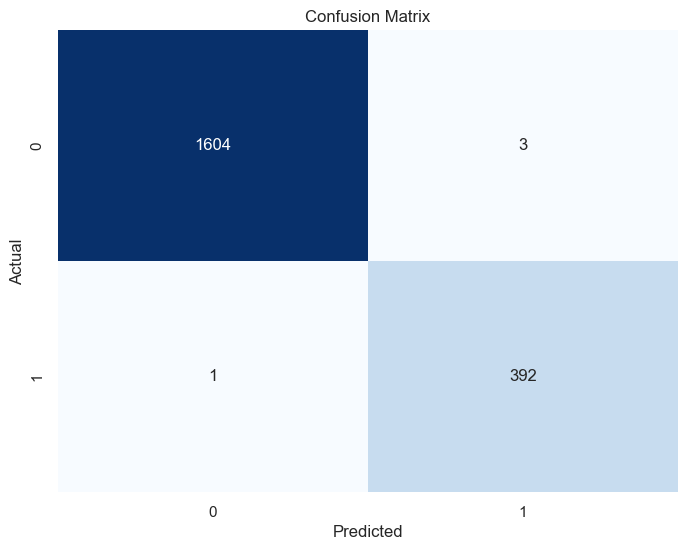

In [383]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## Support Vector Machine

</font>


Support Vector Machine is a powerful supervised learning algorithm used for classification and regression tasks. It aims to find the optimal hyperplane that best separates different classes in the feature space. SVM works by maximizing the margin between classes while minimizing classification errors. It's effective in handling high-dimensional data and works well in scenarios with clear class boundaries.

In [384]:
from sklearn.svm import SVC  

# Initialize the Support Vector Classifier (SVM)
model_svm = SVC()  

# Fit the SVM model on the training data
model_svm.fit(X_train, y_train)

# Predict on the validation set using SVM
y_pred_svm = model_svm.predict(X_test)

# Calculate the accuracy of the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy of the Support Vector Machine (SVM):", svm_accuracy)


Accuracy of the Support Vector Machine (SVM): 0.999


In [385]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      1.00      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



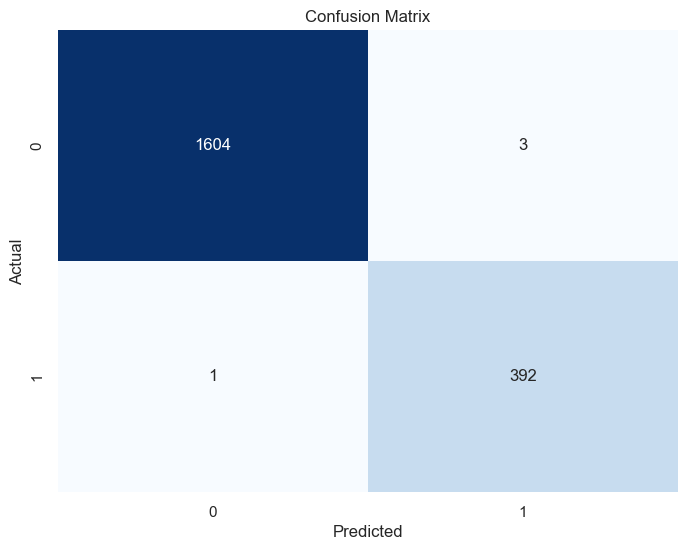

In [386]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## KNN

</font>


K-Nearest Neighbors is a simple yet effective non-parametric algorithm used for both classification and regression tasks. It makes predictions based on the majority class or average of the k-nearest data points in the feature space. KNN doesn't involve model training, storing the entire dataset for prediction, and its performance heavily relies on the choice of k and distance metrics.

In [387]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors Classifier (KNN)
model_knn = KNeighborsClassifier()

# Fit the KNN model on the training data
model_knn.fit(X_train, y_train)

# Predict on the validation set using KNN
y_pred = model_knn.predict(X_test)

# Calculate the accuracy of the KNN model
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the K-Nearest Neighbors (KNN) Classifier:", knn_accuracy)

Accuracy of the K-Nearest Neighbors (KNN) Classifier: 0.999


In [388]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



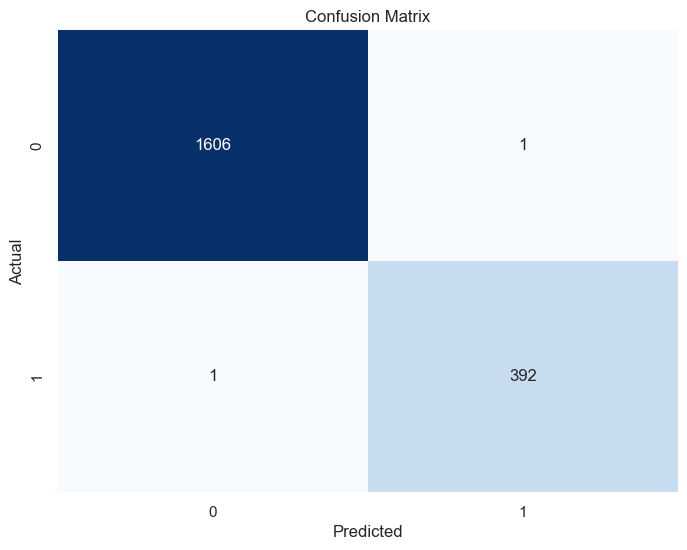

In [389]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## Decision Tree

</font>


Decision Tree is a versatile supervised learning algorithm used for both classification and regression tasks. It partitions the feature space into segments based on the features' values, forming a tree-like structure to make predictions. Each node in the tree represents a feature and a decision point, optimizing to minimize impurity or maximize information gain at each step. Decision Trees are easy to interpret and visualize, making them valuable in understanding feature importance.

In [390]:
from sklearn.tree import DecisionTreeClassifier  

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()  

# Fitting the model on the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating the accuracy
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree model:", decision_tree_accuracy)


Accuracy of the Decision Tree model: 0.998


In [391]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      1.00      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



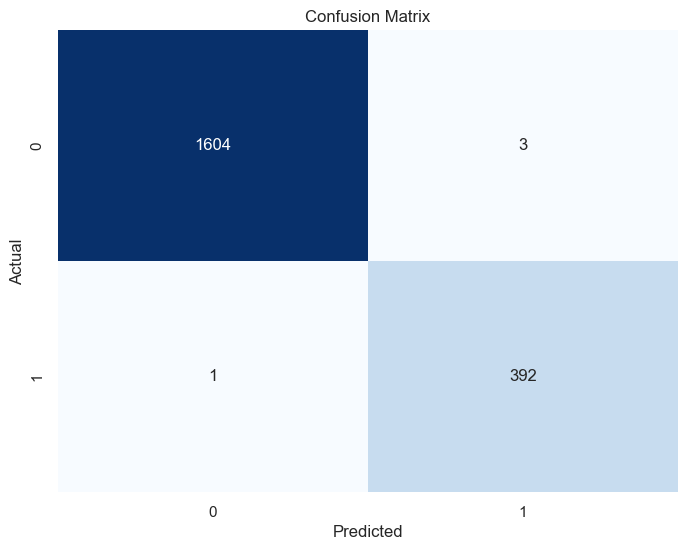

In [392]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## Naive Bayes

</font>


Naive Bayes is a family of simple probabilistic classifiers based on Bayes' theorem, assuming independence among features. Despite its "naive" assumption, it often performs well in classification tasks. It calculates the probability of an observation belonging to a certain class using the probability of features occurring in that class. Naive Bayes is computationally efficient, particularly for large datasets with high-dimensional features.


In [393]:
from sklearn.naive_bayes import GaussianNB  

# Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating the accuracy
naive_bayes_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Gaussian Naive Bayes model:", naive_bayes_accuracy)


Accuracy of the Gaussian Naive Bayes model: 0.999


In [394]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



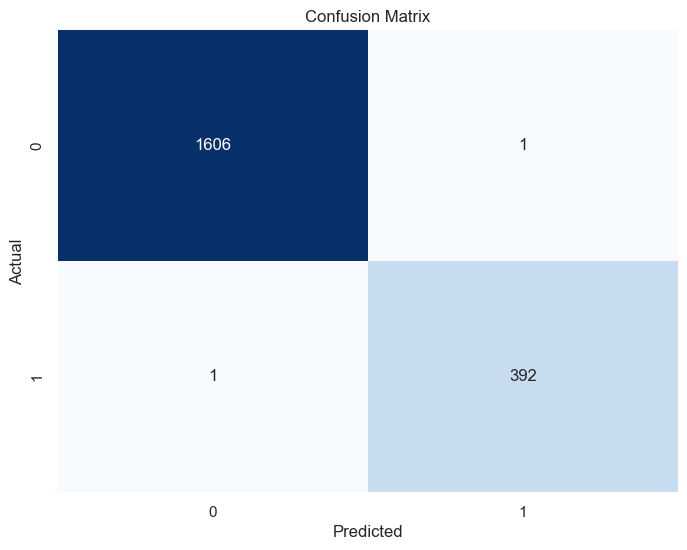

In [395]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [396]:
# For train data
model_accuracies_train = {
    'Logistic Regression': logistic_regression_accuracy,
    'Random Forest': random_forest_accuracy,
    'Gradient Boosting': gboost_accuracy,
    'SVM': svm_accuracy,
    'KNN': knn_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Naive Bayes': naive_bayes_accuracy
}

accuracy_df = pd.DataFrame(list(model_accuracies_train.items()), columns=['Model Name', 'Accuracy'])

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

accuracy_df

,Model Name,Accuracy
0,Logistic Regression,0.9990
1,Random Forest,0.9990
3,SVM,0.9990
4,KNN,0.9990
6,Naive Bayes,0.9990
2,Gradient Boosting,0.9980
5,Decision Tree,0.9980


## **Conclusion**

### **Insights:**
- **Customer Churn Analysis Insights:**
  - Age, credit score, and tenure exhibit strong correlations with churn behavior.
  - Gender doesn't significantly impact churn.
  - Higher product usage correlates with higher churn probability.
  - Active members tend to stay more with the bank.

### **Model Performance:**
- Achieved exceptionally high accuracy across multiple models:
  - Logistic Regression, Random Forest, SVM, KNN, Naive Bayes: 99.9%
  - Gradient Boosting, Decision Tree: 99.8%

### **Analysis Outcome:**
- The models demonstrate exceptional predictive performance, indicating robust feature selection and model training.
- Insights provide a clear understanding of churn drivers: age, credit score, tenure, and product usage.
- Implementation of these insights can aid in devising targeted retention strategies and enhancing customer satisfaction.

### **Recommendations:**
- Leverage insights to tailor retention programs for different customer segments.
- Focus on enhancing services for higher product usage customers to reduce churn.
- Continuous monitoring and adaptation of strategies based on ongoing data analysis.

### **Further Steps:**
- Explore additional features or behavioral patterns to improve model accuracy.
- Conduct a cost-benefit analysis to assess the impact of implemented strategies on customer retention.


### If this Kernel helped you in any way, some <font color="red"><b>UPVOTES</b></font> would be very much appreciated